In [ ]:
import numpy as np
import pandas as pd
import time
import math
import seaborn as sns
import matplotlib.pyplot as plt 
import geopandas as gpd
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import ExtraTreesRegressor as ETR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN

import warnings
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    message=".*use_inf_as_na option is deprecated.*"
)

In [ ]:
df = pd.read_csv("Wosis_data/cec_texture.csv", low_memory=False)
#print(df.columns)

X = df.drop(['cec'], axis=1).values
Y = df.cec.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=5)

df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Latitude,Longitude,cec,sand,silt,clay,depth_avg
count,311392.00,311392.00,311392.00,311392.00,311392.00,311392.00,311392.00
mean,-62.40,28.51,14.66,39.00,34.87,26.10,69.41
std,67.67,22.07,12.42,27.76,21.24,18.07,83.48
min,-172.36,-77.85,0.10,-3.00,-4.25,-0.60,0.50
25%,-98.32,20.12,5.30,14.00,16.90,12.00,20.00
50%,-90.97,37.63,11.50,35.00,33.10,23.00,51.00
75%,-60.87,41.00,20.60,61.00,51.10,36.30,100.00
max,178.50,78.67,139.00,100.00,99.30,100.00,3284.50


## Plot data set

C:\Users\mendo\AppData\Local\Temp\ipykernel_23908\4243622178.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


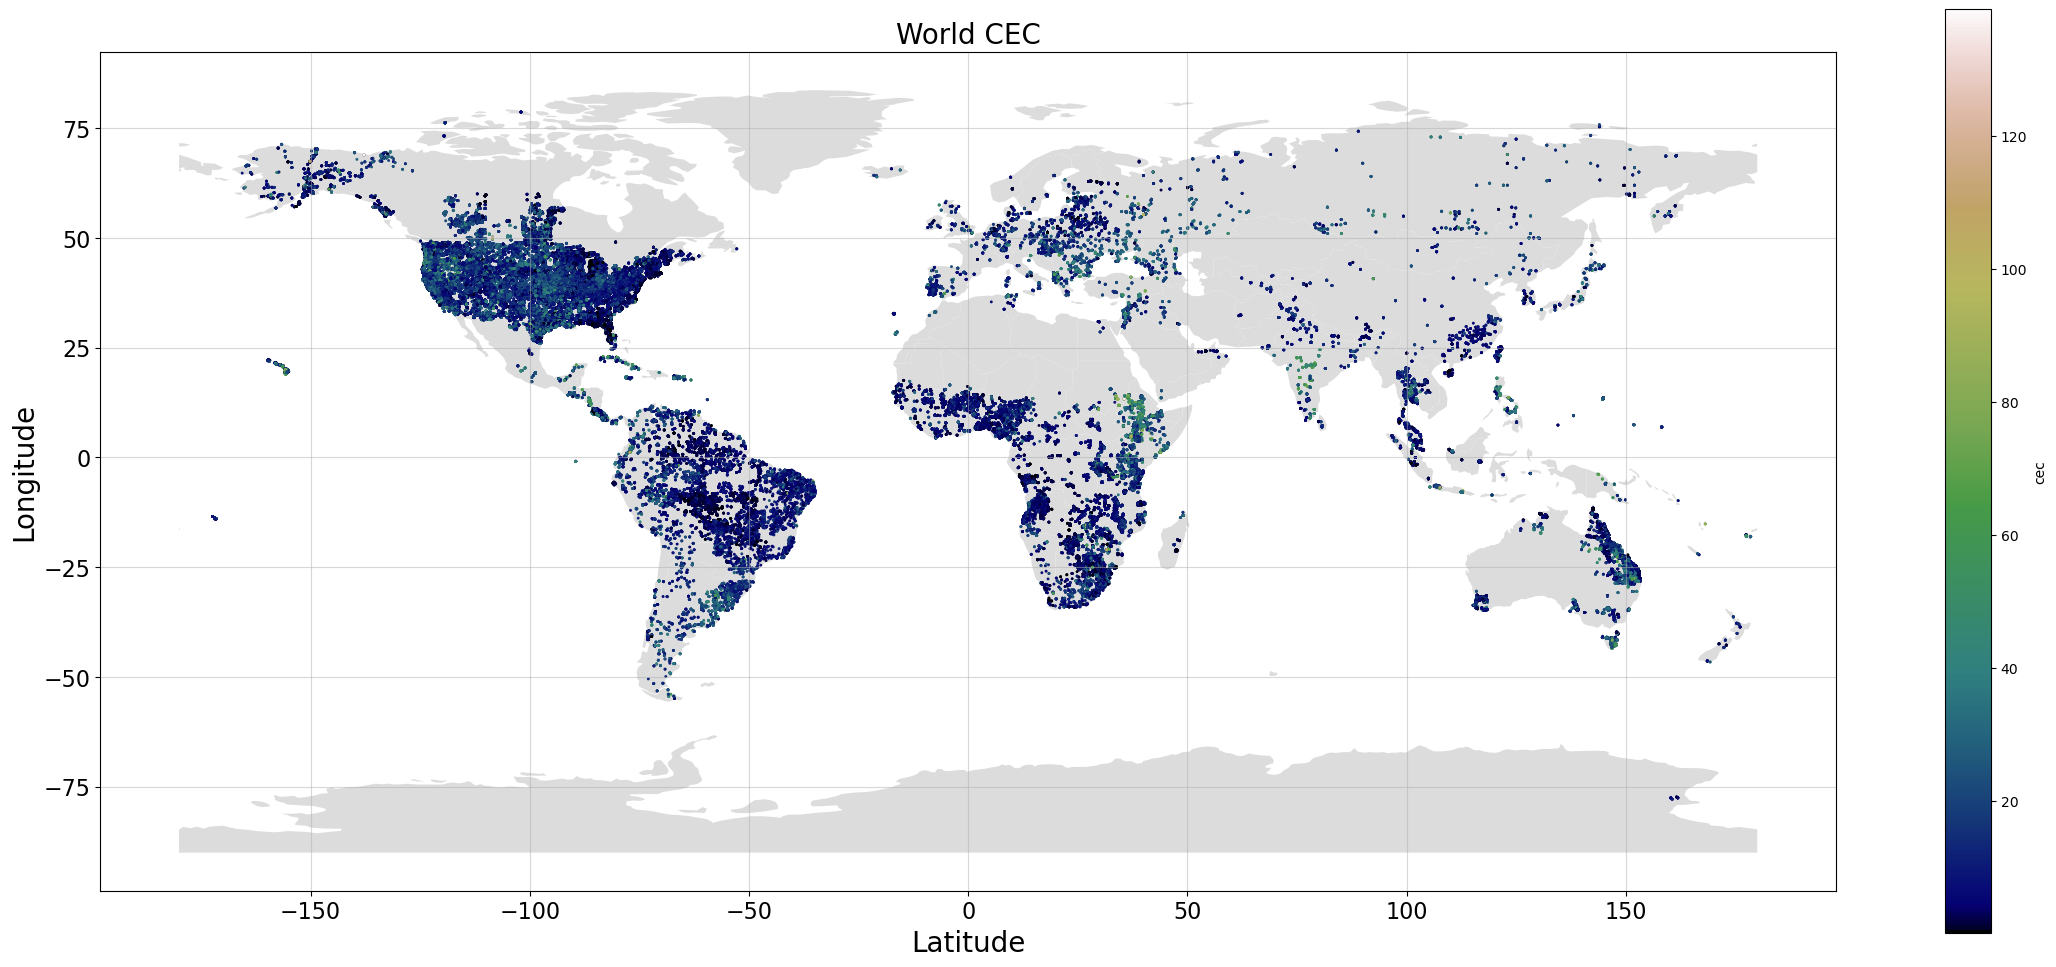

<Figure size 640x480 with 0 Axes>

In [12]:
# initialize an axis
fig, ax = plt.subplots(figsize=(28,12))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="gainsboro", ax=ax)

# parse dates for plot's title
cec_min = df["cec"].min()
cec_max= df["cec"].max()

# plot points
df.plot(x="Latitude", y="Longitude", kind="scatter", alpha = 1, s = 1.2, c="cec", colormap="gist_earth", ax=ax)

# add grid
ax.grid(alpha=0.5)
ax.set_xlabel("Latitude",   fontsize=20)
ax.set_ylabel("Longitude",  fontsize=20)
ax.set_title("World CEC",  fontsize=20)

ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.show()
plt.savefig("data_cec", dpi=300)

c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

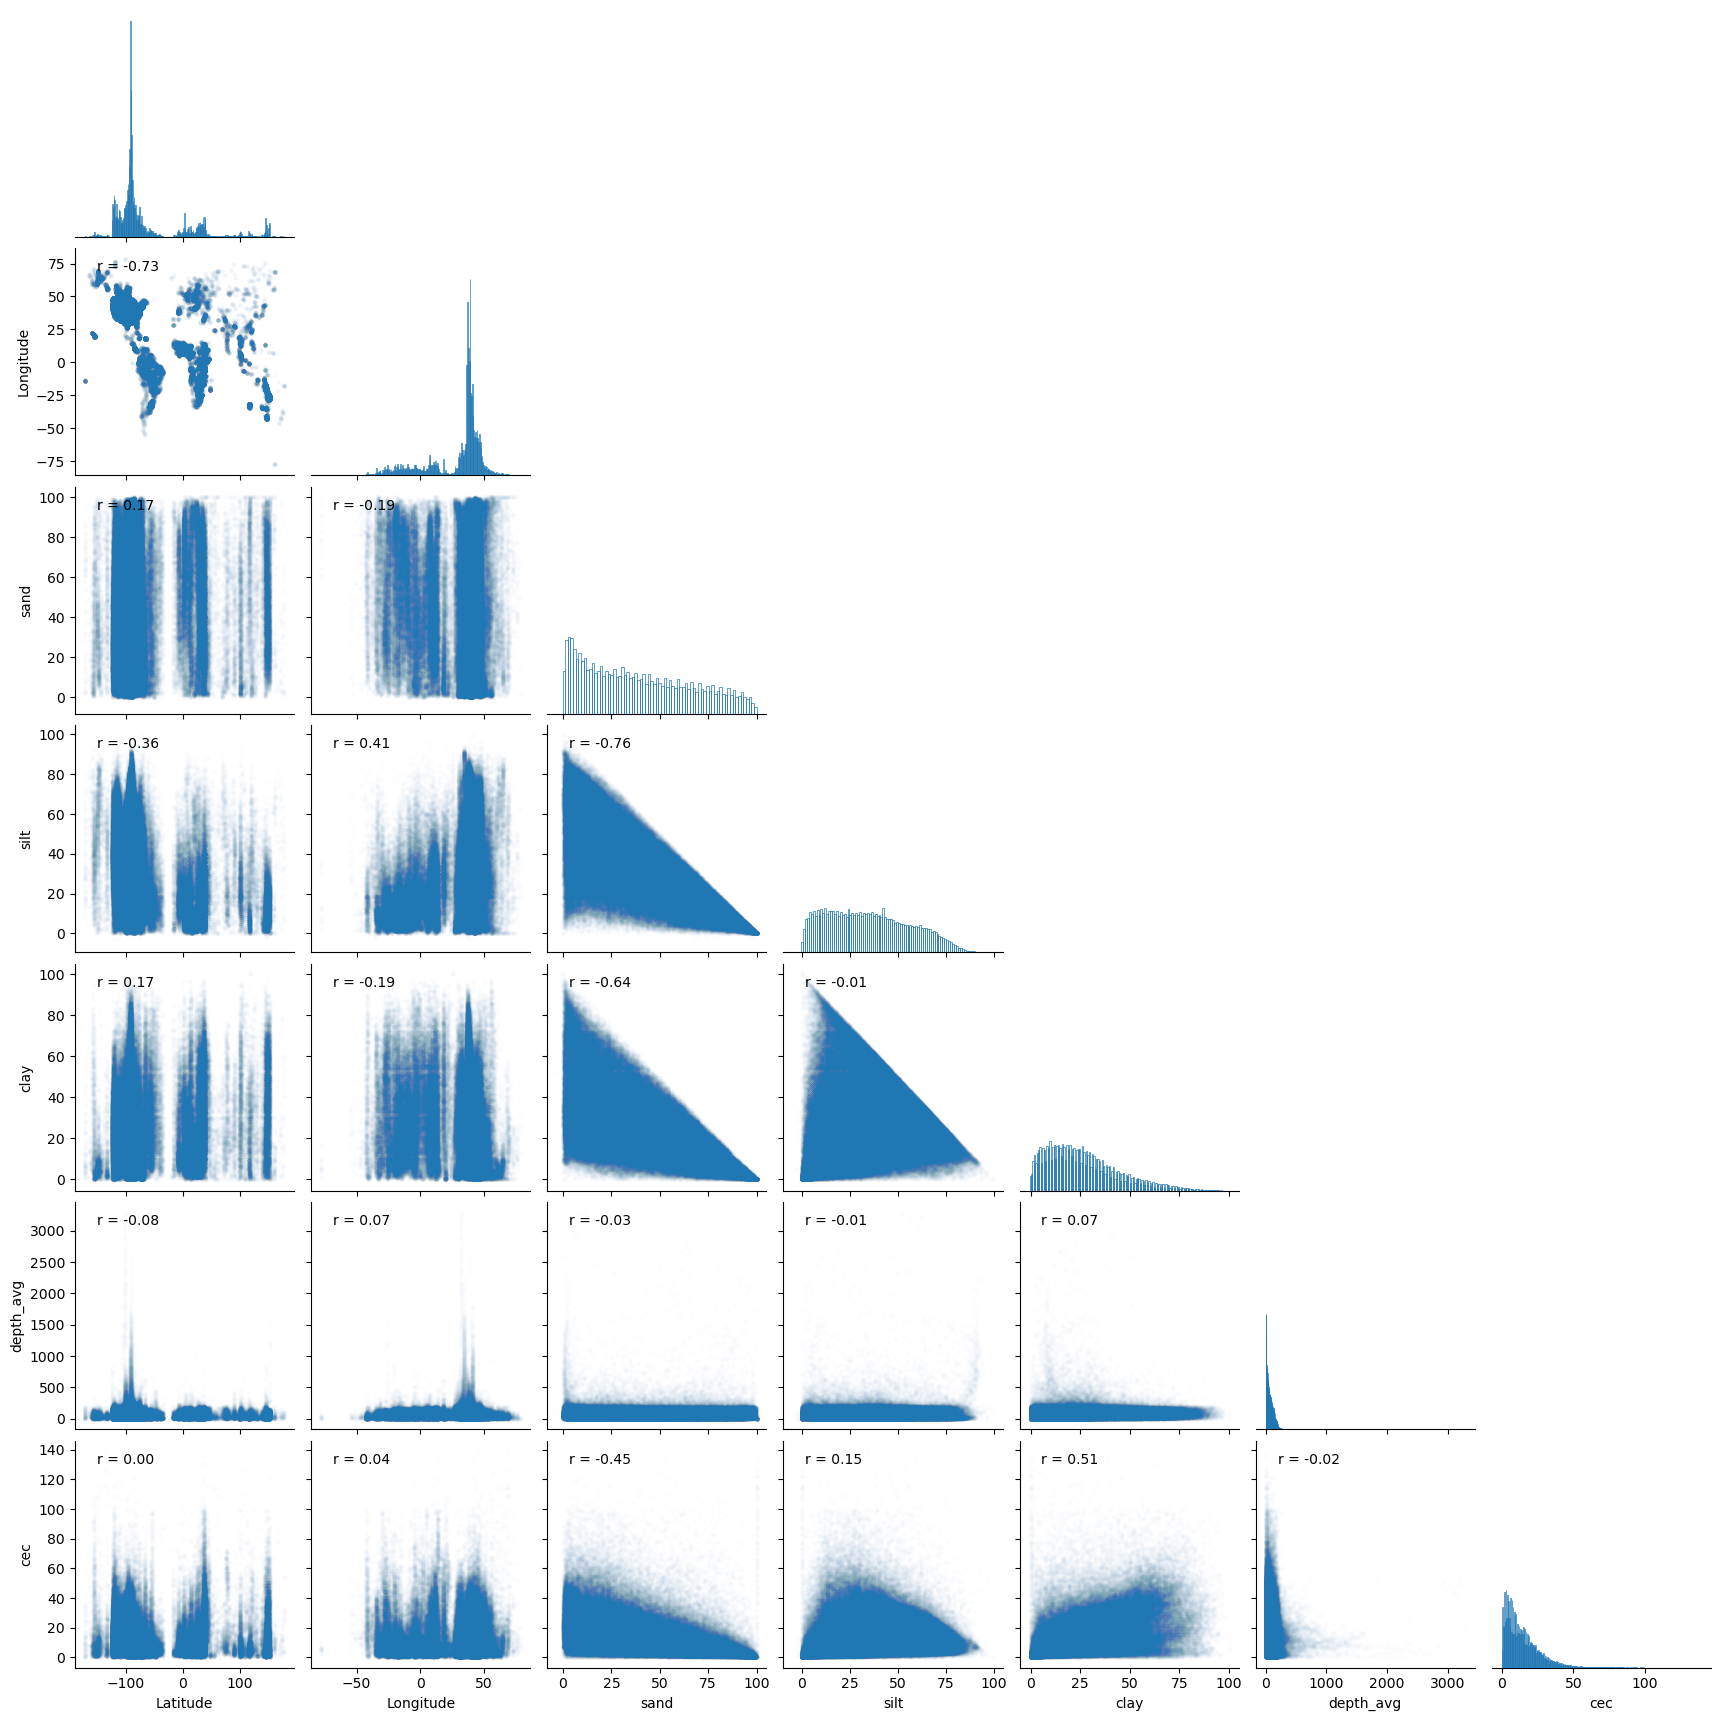

12.279925107955933


c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


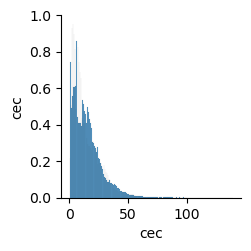

In [13]:
# Define the corrfunc function
def corrfunc(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(0.1, 0.9), xycoords=ax.transAxes)

# Start timing
a = time.time()

# Create the pairplot
g = sns.pairplot(
    df.loc[:, ['Latitude', 'Longitude', 'sand', 'silt', 'clay', 'depth_avg', 'cec']],
    plot_kws=dict(marker=".", linewidth=0.1, alpha=0.01),
    diag_kws=dict(fill=False),
    corner=True
)

# Apply the corrfunc to the lower triangle
g.map_lower(corrfunc)

# Display the plot
plt.show()

# End timing
b = time.time()
print(b - a)

# Create a pairplot for 'cec' column
g = sns.pairplot(df.loc[:, ['cec']])

## Polynomial model

In [ ]:
a = time.time()

clay_train = X_train[:,-2].reshape(-1, 1)
clay_test = X_test[:,-2].reshape(-1, 1)

LinReg = LinearRegression() # call an instance of the class LinearRegression

LinReg.fit(clay_train, y_train) # fit the model on the training data
y_hat_train = LinReg.predict(clay_train) # predict training data
RMSE_train = func.RMSE(y_train, y_hat_train) # Compute training set RMSE

y_hat_test = LinReg.predict(clay_test) # predict test data
RMSE_test = func.RMSE(y_test, y_hat_test) # Test set RMSE

R_train = LinReg.score(clay_train, y_train) # Training set R²
R_test = LinReg.score(clay_test, y_test) # Test set R²

print('Training set RMSE: {}'.format(RMSE_train))
print('Test set RMSE: {}'.format(RMSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

b = time.time()
print(b-a)

Training set RMSE: 10.68140290943398
Test set RMSE: 10.658066237974577
Train set R²: 0.2628883161139819
Test set R²: 0.2588924247740322
0.03599143028259277


In [ ]:
degrees = np.arange(1, 8, 1)
RMSE_test_pol, R2_test_pol = [], []
RMSE_train_pol, R2_train_pol = [], []
    
for degree in degrees: 
    poly = PolynomialFeatures(degree=degree)
    poly.fit(X)
    X_t = poly.transform(X)

    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, Y, train_size=0.7, random_state=5)

    a = time.time()

    LinReg = LinearRegression() # call an instance of the class LinearRegression

    LinReg.fit(X_train_t, y_train_t) # fit the model on the training data
    y_hat_train_t = LinReg.predict(X_train_t) # predict training data
    RMSE_train_t = func.RMSE(y_train_t, y_hat_train_t) # Compute training set RMSE

    y_hat_test_t = LinReg.predict(X_test_t) # predict test data
    RMSE_test_t = func.RMSE(y_test_t, y_hat_test_t) # Test set RMSE

    R2_train_t = LinReg.score(X_train_t, y_train_t) # Training set R²
    R2_test_t = LinReg.score(X_test_t, y_test_t) # Test set R²
    
    RMSE_test_pol.append(RMSE_test_t)
    RMSE_train_pol.append(RMSE_train_t)
    
    R2_test_pol.append(R2_test_t)
    R2_train_pol.append(R2_train_t)
    
    b = time.time()
    print(b-a)

0.05030393600463867
0.24289894104003906
0.5599265098571777
1.6554224491119385
4.135821580886841
9.564529180526733
19.842498302459717


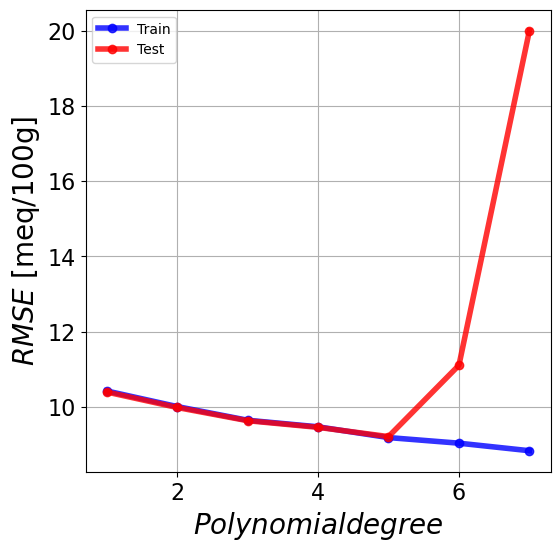

<Figure size 640x480 with 0 Axes>

In [ ]:
""""Ploting Polinomial performance"""
lw = 4                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
fig, ((ax)) = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(degrees, RMSE_train_pol,       c = "blue",           marker="o", alpha=aa, linewidth=lw, label= 'Train')
ax.plot(degrees, RMSE_test_pol,     c = 'red',      marker="o", alpha=aa, linewidth=lw, label= 'Test')

ax.set_xlabel("$Polynomial degree$",   fontsize=20)
ax.set_ylabel("$RMSE$ [meq/100g]",  fontsize=20)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.legend(loc='best', fontsize=10)
ax.grid()
plt.show()

plt.savefig("Pol_cec", dpi=100)

## KNearest Neighbor

In [ ]:
k_ = [1, 3, 5, 10 , 15, 22, 30, 40, 50]
score_train_knn_, score_test_knn_, RMSE_train_knn_, RMSE_test_knn_ = [], [], [], []
    
for k in k_:
    a = time.time()
    print('current k', k)
    
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_knn = knn.predict(X_train)
    y_test_knn = knn.predict(X_test)

    score_train_knn = knn.score(X_train, y_train) 
    score_test_knn = knn.score(X_test, y_test)

    RMSE_train_knn = math.sqrt(np.square(np.subtract(y_train, y_train_knn)).mean()) 
    RMSE_test_knn = math.sqrt(np.square(np.subtract(y_test, y_test_knn)).mean()) 

    score_train_knn_.append(score_train_knn)
    score_test_knn_.append(score_test_knn)
    RMSE_train_knn_.append(RMSE_train_knn)
    RMSE_test_knn_.append(RMSE_test_knn)

    print(score_train_knn, score_test_knn, RMSE_train_knn, RMSE_test_knn)
    
    b = time.time()
    print(b-a)

current depth 1
12.602231979370117
current depth 3
34.44553899765015
current depth 5
43.30283832550049
current depth 10
55.78515958786011
current depth 15
77.65777683258057
current depth 22
84.50192761421204
current depth 30
105.43786549568176
current depth 40
111.0742564201355
current depth 50
113.204993724823


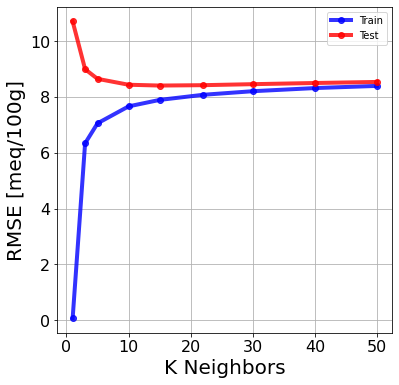

[0.9999572991500661, 0.7405839652090317, 0.6784749498029089, 0.6207851525160228, 0.597498437297002, 0.5785898649412038, 0.5650583186643133, 0.5530677802349707, 0.5446805035850923] [0.25259355786871873, 0.47228204014910813, 0.5121001100548055, 0.535643438297924, 0.5388105181760281, 0.5373603740349276, 0.5333893258980187, 0.528765524022799, 0.524494493166078]


<Figure size 432x288 with 0 Axes>

In [ ]:
""""Ploting K Nearest Neighbors performance"""
lw = 4                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
fig, ((ax)) = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(k_, RMSE_train_knn_,       c = "blue",           marker="o", alpha=aa, linewidth=lw, label= 'Train')
ax.plot(k_, RMSE_test_knn_,     c = 'red',      marker="o", alpha=aa, linewidth=lw, label= 'Test')

ax.set_xlabel("K Neighbors",   fontsize=20)
ax.set_ylabel("RMSE [meq/100g]",  fontsize=20)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.legend(loc='best', fontsize=10)
ax.grid()
plt.show()
print(score_train_knn_, score_test_knn_)
#print(rf.feature_importances_)
plt.savefig("KNN_cec", dpi=100)

In [ ]:
k_ = [1, 3, 5, 10 , 15, 22, 30, 40, 50]
X_ll = df.drop(['cec', 'clay', 'silt', 'sand', 'depth_avg'], axis=1).values
Y = df.cec.values

X_train_ll, X_test_ll, y_train, y_test = train_test_split(X_ll, Y, train_size=0.7, random_state=5)

score_train_knn_, score_test_knn_, RMSE_train_knn_, RMSE_test_knn_ = [], [], [], []

for k in k_:
    a = time.time()
    print('current k', k)
    
    knn = KNN(n_neighbors=k)
    knn.fit(X_train_ll, y_train)

    y_train_knn = knn.predict(X_train_ll)
    y_test_knn = knn.predict(X_test_ll)

    score_train_knn = knn.score(X_train_ll, y_train) 
    score_test_knn = knn.score(X_test_ll, y_test)

    RMSE_train_knn = math.sqrt(np.square(np.subtract(y_train, y_train_knn)).mean()) 
    RMSE_test_knn = math.sqrt(np.square(np.subtract(y_test, y_test_knn)).mean()) 

    score_train_knn_.append(score_train_knn)
    score_test_knn_.append(score_test_knn)
    RMSE_train_knn_.append(RMSE_train_knn)
    RMSE_test_knn_.append(RMSE_test_knn)

    print(score_train_knn, score_test_knn, RMSE_train_knn, RMSE_test_knn)
    
    b = time.time()
    print(b-a)

current depth 1
0.6006011756285657 0.4397577426256618 7.862579337532308 9.2667131646381
5.748367071151733
current depth 3
0.7275956709517329 0.5779316911297971 6.493347602491335 8.043205426395714
7.9568564891815186
current depth 5
0.7207382608819299 0.5848282748349867 6.57457022822563 7.977221904434839
6.804759979248047
current depth 10
0.6305258281498843 0.5420112508177386 7.562296339587236 8.378479153975352
10.694533348083496
current depth 15
0.5760369334941331 0.5125910143756822 8.100758067865547 8.64339885875703
11.111359357833862
current depth 22
0.5297628724031741 0.48476178584285656 8.531396129677328 8.886726652950928
11.456199884414673
current depth 30
0.4983937080966624 0.4634084659305232 8.811363896733168 9.069006161833444
14.166648387908936
current depth 40
0.4726822529584045 0.4455822271805341 9.034369388187859 9.218417232012575
16.317421674728394
current depth 50
0.4524972797242295 0.4306868809561727 9.205657023681953 9.34143044788486
17.528529167175293


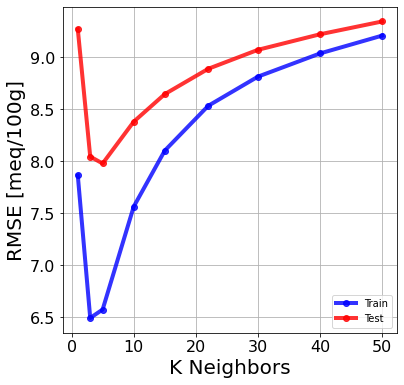

[0.6006011756285657, 0.7275956709517329, 0.7207382608819299, 0.6305258281498843, 0.5760369334941331, 0.5297628724031741, 0.4983937080966624, 0.4726822529584045, 0.4524972797242295] [0.4397577426256618, 0.5779316911297971, 0.5848282748349867, 0.5420112508177386, 0.5125910143756822, 0.48476178584285656, 0.4634084659305232, 0.4455822271805341, 0.4306868809561727]


<Figure size 432x288 with 0 Axes>

In [ ]:
""""Ploting K Nearest Neighbors performance"""
lw = 4                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
fig, ((ax)) = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(k_, RMSE_train_knn_,       c = "blue",           marker="o", alpha=aa, linewidth=lw, label= 'Train')
ax.plot(k_, RMSE_test_knn_,     c = 'red',      marker="o", alpha=aa, linewidth=lw, label= 'Test')

ax.set_xlabel("K Neighbors",   fontsize=20)
ax.set_ylabel("RMSE [meq/100g]",  fontsize=20)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.legend(loc='best', fontsize=10)
ax.grid()
plt.show()
print(score_train_knn_, score_test_knn_)
#print(rf.feature_importances_)
plt.savefig("KNN_cec", dpi=100)

## Random forest

In [ ]:
parameter_grid = {
    "max_depth": [50],
   "criterion": ['squared_error', 'absolute_error', 'poisson'],
  #  "criterion": ['squared_error'],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 3]}

In [ ]:
# a = time.time()

# rf = RF(n_estimators=1000, n_jobs=-1)
# clf = GridSearchCV(rf, parameter_grid, cv = 10)

# clf.fit(X_train, y_train)
# print("Best hyperparameters: " + str(clf.best_params_))

# y_train_rf = clf.predict(X_train)
# y_test_rf = clf.predict(X_test)

# score_train_rf = clf.score(X_train, y_train) 
# score_test_rf = clf.score(X_test, y_test)

# RMSE_train_rf = math.sqrt(np.square(np.subtract(y_train, y_train_rf)).mean()) 
# RMSE_test_rf = math.sqrt(np.square(np.subtract(y_test, y_test_rf)).mean()) 
 
# print('Score random forest on training set: ' + str(score_train_rf))
# print('RMSE random forest on training set: ' + str(RMSE_train_rf))

# print('Score random forest on test set: ' + str(score_test_rf))
# print('RMSE random forest on test set: ' + str(RMSE_test_rf))

# b = time.time()
# print(b-a)

In [ ]:

depth_ = [1, 3, 5, 10 , 15, 22, 30, 40, 50]
score_train_rf_, score_test_rf_, RMSE_train_rf_, RMSE_test_rf_ = [], [], [], []
    
for depth in depth_:
    a = time.time()
    print('current depth', depth)
    
    rf = RF(n_estimators=2000, n_jobs=-1, criterion= 'squared_error', max_features= 'sqrt', min_samples_split= 2, max_depth = int(depth))
    rf.fit(X_train, y_train)

    y_train_rf = rf.predict(X_train)
    y_test_rf = rf.predict(X_test)

    score_train_rf = rf.score(X_train, y_train) 
    score_test_rf = rf.score(X_test, y_test)

    RMSE_train_rf = math.sqrt(np.square(np.subtract(y_train, y_train_rf)).mean()) 
    RMSE_test_rf = math.sqrt(np.square(np.subtract(y_test, y_test_rf)).mean()) 

    score_train_rf_.append(score_train_rf)
    score_test_rf_.append(score_test_rf)
    RMSE_train_rf_.append(RMSE_train_rf)
    RMSE_test_rf_.append(RMSE_test_rf)

    b = time.time()
    print(b-a)
rf.feature_importances_()

current depth 1
10.345564126968384
current depth 3
16.434882164001465
current depth 5
23.895191192626953
current depth 10
38.15035390853882
current depth 15
57.84717869758606
current depth 22
107.23862266540527
current depth 30
134.78991508483887
current depth 40
137.0200972557068
current depth 50
137.9699742794037


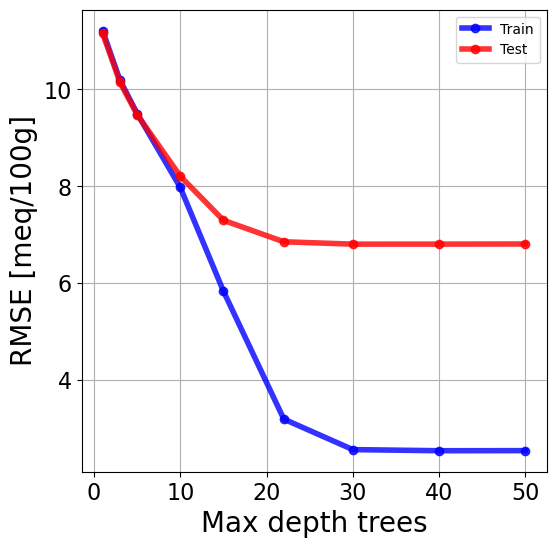

[0.18814455440976485, 0.32921857633794793, 0.416921510974558, 0.5891871100309469, 0.7800425459725929, 0.9341169879837912, 0.9575203756244085, 0.9582781052590769, 0.9582211818649281] [0.1885213859169782, 0.3280779332185423, 0.4140934266683983, 0.5605976121293681, 0.652591082793177, 0.693547887939409, 0.697885546551329, 0.6978355734593402, 0.6975832408198507]
[0.22491144 0.18326938 0.17118448 0.10186098 0.23501199 0.08376173]


<Figure size 640x480 with 0 Axes>

In [ ]:
""""Ploting Random Forest performance"""
lw = 4                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
fig, ((ax)) = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(depth_, RMSE_train_rf_,       c = "blue",           marker="o", alpha=aa, linewidth=lw, label= 'Train')
ax.plot(depth_, RMSE_test_rf_,     c = 'red',      marker="o", alpha=aa, linewidth=lw, label= 'Test')

ax.set_xlabel("Max depth trees",   fontsize=20)
ax.set_ylabel("RMSE [meq/100g]",  fontsize=20)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.legend(loc='best', fontsize=10)
ax.grid()
plt.show()
print(score_train_rf_, score_test_rf_)
print(rf.feature_importances_)
plt.savefig("RF_cec", dpi=100)

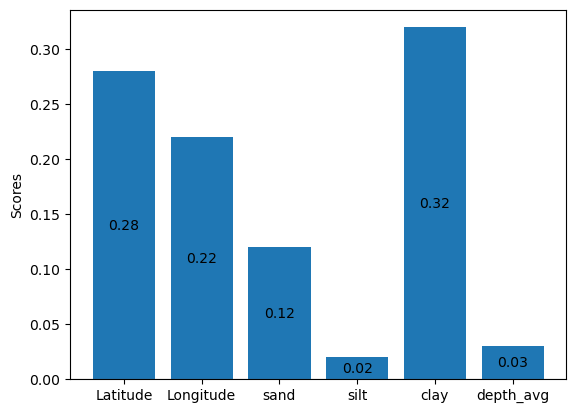

In [ ]:
np.set_printoptions(precision=2)

x_labels = ['Latitude', 'Longitude', 'sand', 'silt', 'clay', 'depth_avg']
feature_importances = [0.28, 0.22, 0.12, 0.02, 0.32, 0.03]
fig, ax = plt.subplots()

p1 = ax.bar(range(len(feature_importances)), feature_importances)

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_xticks(range(len(feature_importances)), labels=['Latitude', 'Longitude', 'sand', 'silt', 'clay', 'depth_avg'])

ax.bar_label(p1, label_type='center')
plt.show()

## Extra Random Forest

In [ ]:
parameter_grid = {
    "max_depth": [50],
   "criterion": ['squared_error', 'absolute_error', 'poisson'],
 #   "criterion": ['squared_error'],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 3]}

In [ ]:
a = time.time()

ert = ETR(n_estimators=1000, n_jobs=-1)

gs_erf = GridSearchCV(ert, parameter_grid, cv = 10)

gs_erf.fit(X_train, y_train)
print("Best hyperparameters: " + str(gs_erf.best_params_))

y_train_erf = gs_erf.predict(X_train)
y_test_erf = gs_erf.predict(X_test)

score_train_erf = gs_erf.score(X_train, y_train) 
score_test_erf = gs_erf.score(X_test, y_test)

RMSE_train_erf = math.sqrt(np.square(np.subtract(y_train, y_train_erf)).mean()) 
RMSE_test_erf = math.sqrt(np.square(np.subtract(y_test, y_test_erf)).mean()) 

print('RMSE extra random forest on training set: ' + str(RMSE_train_erf))
print('Score extra random forest on training set: ' + str(score_train_erf))

print('Score extra random forest on test set: ' + str(score_test_erf))
print('RMSE extra random forest on test set: ' + str(RMSE_test_erf))

b = time.time()
print(b-a)

In [ ]:
depth_ = [1, 3, 5, 10 , 15, 22, 30, 40, 50]

score_train_ETR_, score_test_ETR_, RMSE_train_ETR_, RMSE_test_ETR_ = [], [], [], []
    
for depth in depth_:
    a = time.time()
    print('current depth', depth)
    
    etr = ETR(n_estimators=2000, n_jobs=-1, criterion= 'squared_error', max_features= 'sqrt', min_samples_split= 3, max_depth = int(depth))
    etr.fit(X_train, y_train)

    y_train_ETR = etr.predict(X_train)
    y_test_ETR = etr.predict(X_test)

    score_train_ETR = etr.score(X_train, y_train) 
    score_test_ETR = etr.score(X_test, y_test)

    RMSE_train_ETR = math.sqrt(np.square(np.subtract(y_train, y_train_ETR)).mean()) 
    RMSE_test_ETR = math.sqrt(np.square(np.subtract(y_test, y_test_ETR)).mean()) 

    score_train_ETR_.append(score_train_ETR)
    score_test_ETR_.append(score_test_ETR)
    RMSE_train_ETR_.append(RMSE_train_ETR)
    RMSE_test_ETR_.append(RMSE_test_ETR)

    b = time.time()
    print(b-a)

current depth 1
7.6090247631073
current depth 3
6.681991100311279
current depth 5
8.145723819732666
current depth 10
13.168447971343994
current depth 15
20.664787530899048
current depth 22
44.76068663597107
current depth 30
80.1911289691925
current depth 40
95.07305192947388
current depth 50
95.15964937210083


[0.10721666867345758, 0.23424275662350202, 0.29906771855870307, 0.4079783155305914, 0.5409875885378752, 0.795792177120318, 0.9556792093537667, 0.9814390789765394, 0.9821614606117037] [0.10757625246175528, 0.2342129076266095, 0.29798512023535406, 0.39999600884973785, 0.49130227286572303, 0.5926213080146314, 0.6339347847843919, 0.6381835701513601, 0.6371306911478001]


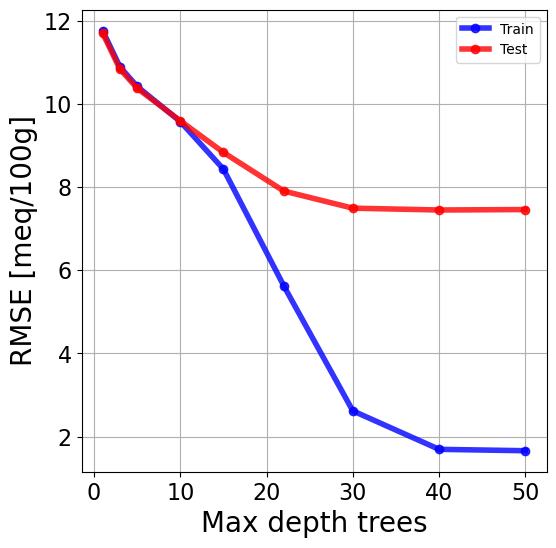

In [ ]:
""""Ploting Extra Random Forest performance"""
lw = 4                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
fig, ((ax1)) = plt.subplots(1, 1, figsize=(6, 6))

ax1.plot(depth_, RMSE_train_ETR_,       c = "blue",           marker="o", alpha=aa, linewidth=lw, label= 'Train')
ax1.plot(depth_, RMSE_test_ETR_,     c = 'red',      marker="o", alpha=aa, linewidth=lw, label= 'Test')

ax1.set_xlabel("Max depth trees",   fontsize=20)
ax1.set_ylabel("RMSE [meq/100g]",  fontsize=20)
ax1.tick_params(axis='y', labelsize=16) 
ax1.tick_params(axis='x', labelsize=16) 
ax1.legend(loc='best', fontsize=10)
ax1.grid()
plt.show   
plt.savefig("ETR_cec", dpi=300)
print(score_train_ETR_, score_test_ETR_)

## Gradient Boosting

In [ ]:
parameter_grid = {
   #"criterion": ['friedman_mse', 'squared_error', 'mse'],
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    "criterion": ['squared_error'],
    'max_depth': [100],
    'min_samples_split': [2, 3] }

In [ ]:
a = time.time()

gbr = GBR(n_estimators=500)

gs_bgr = GridSearchCV(gbr, parameter_grid, cv = 10)

gs_bgr.fit(X_train, y_train)
print("Best hyperparameters: " + str(gs_bgr.best_params_))

y_train_gs_bgr = gs_bgr.predict(X_train)
y_test_gs_bgr = gs_bgr.predict(X_test)

score_train_gs_bgr = gs_bgr.score(X_train, y_train) 
score_test_gs_bgr = gs_bgr.score(X_test, y_test)

RMSE_train_gs_bgr = math.sqrt(np.square(np.subtract(y_train, y_train_gs_bgr)).mean()) 
RMSE_test_gs_bgr = math.sqrt(np.square(np.subtract(y_test, y_test_gs_bgr)).mean()) 

print('RMSE gradint boosting on training set: ' + str(RMSE_train_gs_bgr))
print('Score gradient boosting on training set: ' + str(score_train_gs_bgr))

print('RMSE extra random forest on test set: ' + str(RMSE_test_gs_bgr))
print('Score extra random forest on test set: ' + str(score_test_gs_bgr))

b = time.time()
print(b-a)

In [ ]:
lw = 2                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
me = 500                       # Plot mark every

fig, ((ax)) = plt.subplots(1, 1, figsize=(12, 6))
a = time.time()

params_1 = {
    "n_estimators": 5000,
    "max_leaf_nodes": 4,
    "learning_rate": 0.1,
}
print(params_1)

reg_1 = GBR(**params_1)
reg_1.fit(X_train, y_train)

print("The R2 on train set: {:.4f}".format(reg_1.score(X_train, y_train)))
print("The R2 on test set: {:.4f}".format(reg_1.score(X_test, y_test)))
print("The RMSE on test set: {:.4f}".format(func.RMSE(y_test, reg_1.predict(X_test))))
print("The RMSE on train set: {:.4f}".format(func.RMSE(y_train, reg_1.predict(X_train))))

test_score_1 = np.zeros((params_1["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg_1.staged_predict(X_test)):
    test_score_1[i] = func.RMSE(y_test, y_pred)

ax.plot(np.arange(params_1["n_estimators"]) + 1, (reg_1.train_score_)**0.5, "b-", marker="o", alpha=aa, linewidth=lw, markevery=me, label="Train Rate=0.1 max_leaf=4")

ax.plot(np.arange(params_1["n_estimators"]) + 1, test_score_1, "r-", marker="o", alpha=aa, linewidth=lw, markevery=me,              label="Test  Rate=0.1 max_leaf=4")

b = time.time()
print(b-a)
#########################################################################
a = time.time()

params_2 = {
    "n_estimators": 5000,
    "max_leaf_nodes": 30,
    "learning_rate": 1,
}

print(params_2)

reg_2 = GBR(**params_2)
reg_2.fit(X_train, y_train)

print("The R2 on train set: {:.4f}".format(reg_2.score(X_train, y_train)))
print("The R2 on test set: {:.4f}".format(reg_2.score(X_test, y_test)))
print("The RMSE on test set: {:.4f}".format(func.RMSE(y_test, reg_2.predict(X_test))))
print("The RMSE on train set: {:.4f}".format(func.RMSE(y_train, reg_2.predict(X_train))))

test_score_2 = np.zeros((params_2["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg_2.staged_predict(X_test)):
    test_score_2[i] = func.RMSE(y_test, y_pred)

ax.plot(np.arange(params_2["n_estimators"]) + 1, (reg_2.train_score_)**0.5, "b-", marker="D", alpha=aa, linewidth=lw, markevery=me, label="Train Rate=1 max_leaf=30")

ax.plot(np.arange(params_2["n_estimators"]) + 1, test_score_2, "r-", marker="D", alpha=aa, linewidth=lw, markevery=me,              label="Test  Rate=1 max_leaf=30")
b = time.time()
print(b-a)

################################################################################
a = time.time()
params_3 = {
    "n_estimators": 5000,
    "max_leaf_nodes": 20,
    "learning_rate": 0.45,
}
print(params_3)

reg_3 = GBR(**params_3)
reg_3.fit(X_train, y_train)

print("The R2 on train set: {:.4f}".format(reg_3.score(X_train, y_train)))
print("The R2 on test set: {:.4f}".format(reg_3.score(X_test, y_test)))
print("The RMSE on test set: {:.4f}".format(func.RMSE(y_test, reg_3.predict(X_test))))
print("The RMSE on train set: {:.4f}".format(func.RMSE(y_train, reg_3.predict(X_train))))

test_score_3 = np.zeros((params_3["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg_3.staged_predict(X_test)):
    test_score_3[i] = func.RMSE(y_test, y_pred)

ax.plot(np.arange(params_3["n_estimators"]) + 1, (reg_3.train_score_)**0.5, "b-", marker="x", alpha=aa, linewidth=lw, markevery=me, label="Train Rate=0.45 max_leaf=20")

ax.plot(np.arange(params_3["n_estimators"]) + 1, test_score_3, "r-", marker="x", alpha=aa, linewidth=lw, markevery=me,              label="Test  Rate=0.45 max_leaf=20")
b = time.time()
print(b-a)


ax.set_xlabel("Tree Number",   fontsize=20)
ax.set_ylabel("RMSE  [meq/100g]",  fontsize=20)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.set_ylim(0, 12)      
ax.legend(loc='best', fontsize=10)
ax.grid()
plt.show()

plt.savefig("GBR_cec_3", dpi=400)

In [ ]:
me = 500
fig, ((ax)) = plt.subplots(1, 1, figsize=(12, 6))
lw=4
ms = 10
ax.plot(np.arange(params_1["n_estimators"]) + 1, (reg_1.train_score_)**0.5, "b-", marker="x", alpha=aa, linewidth=lw, markersize = ms, markevery=me, label="Train Rate=0.1 max_leaf=4")
ax.plot(np.arange(params_1["n_estimators"]) + 1, test_score_1, "r-", marker="x", alpha=aa, linewidth=lw, markersize = ms, markevery=me,              label="Test  Rate=0.1 max_leaf=4")
ax.plot(np.arange(params_2["n_estimators"]) + 1, (reg_2.train_score_)**0.5, "b-", marker="D", alpha=aa, linewidth=lw, markevery=me, markersize = ms, label="Train Rate=1 max_leaf=30")

ax.plot(np.arange(params_2["n_estimators"]) + 1, test_score_2, "r-", marker="D", alpha=aa, linewidth=lw, markersize = ms, markevery=me,              label="Test  Rate=1 max_leaf=30")
ax.plot(np.arange(params_3["n_estimators"]) + 1, (reg_3.train_score_)**0.5, "b-", marker="o", alpha=aa, markersize = ms, linewidth=lw, markevery=me, label="Train Rate=0.45 max_leaf=20")

ax.plot(np.arange(params_3["n_estimators"]) + 1, test_score_3, "r-", marker="o", alpha=aa, linewidth=lw, markevery=me, markersize = ms, label="Test  Rate=0.45 max_leaf=20")
ax.set_xlabel("Tree Number",   fontsize=20)
ax.set_ylabel("RMSE  [meq/100g]",  fontsize=20)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.set_ylim(0, 12)      
ax.legend(loc='best', fontsize=10)
ax.grid()
plt.show()

plt.savefig("GBR_cec_3b", dpi=400)

print(reg_3.feature_importances_)

## Support Vector Machine

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

RMSE_test_svm, RMSE_train_svm = [], []
R2_test_svm, R2_train_svm = [], []

c_ = [0.001, 0.1, 1, 100]
gamma_ = ['auto', 0.1, 10]

for c in c_:
    for gamma in gamma_:
        print('c', 'gamma', c, gamma)
        
        a = time.time()

        SVR_ = SVR(C = c, max_iter=10000, kernel = 'poly', gamma=gamma)
        SVR_.fit(X_train_sc, y_train)

        y_hat_train_svm = SVR_.predict(X_train_sc) # predict training data
        RMSE_train = func.RMSE(y_train, y_hat_train_svm) # Compute training set RMSE
        RMSE_train_svm.append(RMSE_train)
        R2_train = SVR_.score(X_train_sc, y_train) # Training set R²
        R2_train_svm.append(R2_train)

        y_hat_test_svm = SVR_.predict(X_test_sc) # predict test data
        RMSE_test = func.RMSE(y_test, y_hat_test_svm) # Test set RMSE
        RMSE_test_svm.append(RMSE_test)
        R2_test = SVR_.score(X_test_sc, y_test) # Test set R²
        R2_test_svm.append(R2_test)

        print(RMSE_train, R2_train, RMSE_test, R2_test)

        b = time.time()
        print('time', b-a)

In [ ]:
""""Ploting Support Vector Machine performance"""
lw = 4                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
fig, ((ax)) = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(c_, RMSE_train_svm,       c = "blue",           marker="o", alpha=aa, linewidth=lw, label= 'Train')
ax.scatter(c_, RMSE_test_svm,     c = 'red',      marker="o", alpha=aa, linewidth=lw, label= 'Test')

ax.set_xlabel("$C$",   fontsize=20)
ax.set_ylabel("$RMSE$ [meq/100g]",  fontsize=20)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.set_ylim(0, 12)      
ax.legend(loc='best', fontsize=10)
ax.grid()
    
plt.savefig("SVM_cec", dpi=100)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

RMSE_test_svm, RMSE_train_svm = [], []
R2_test_svm, R2_train_svm = [], []

c_ = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

for c in c_:
    print('c', c)
    a = time.time()

    SVR_ = LinearSVR(C = c, loss = 'squared_epsilon_insensitive', max_iter=10000)
    SVR_.fit(X_train_sc, y_train)

    y_hat_train_svm = SVR_.predict(X_train_sc) # predict training data
    RMSE_train = func.RMSE(y_train, y_hat_train_svm) # Compute training set RMSE
    R2_train = SVR_.score(X_train_sc, y_train) # Training set R²

    y_hat_test_svm = SVR_.predict(X_test_sc) # predict test data
    RMSE_test = func.RMSE(y_test, y_hat_test_svm) # Test set RMSE
    R2_test = SVR_.score(X_test_sc, y_test) # Test set R²

    RMSE_train_svm.append(RMSE_train)
    R2_train_svm.append(R2_train)
    RMSE_test_svm.append(RMSE_test)
    R2_test_svm.append(R2_test)

    print(RMSE_train, R2_train, RMSE_test, R2_test)

    b = time.time()
    print('time', b-a)

C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_

c, gamma, score_cv -1 -10 nan
2.4850127696990967


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_

c, gamma, score_cv -1 10 nan
0.7594120502471924
c, gamma, score_cv 1 -10 nan
0.6738371849060059


In [ ]:
""""Ploting Support Vector Machine performance"""
lw = 4                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
fig, ((ax)) = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(c_, RMSE_train_svm,  c = "blue",           marker="o", alpha=aa, linewidth=lw, label= 'Train')
ax.scatter(c_, RMSE_test_svm,  c = 'red',      marker="o", alpha=aa, linewidth=lw, label= 'Test')

ax.set_xlabel("C",   fontsize=20)
ax.set_ylabel("RMSE [meq/100g]",  fontsize=20)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.legend(loc='best', fontsize=10)
ax.set_ylim(0, 12)      
print(R2_train_svm, R2_test_svm)
ax.grid()
    
plt.savefig("SVM_squared_cec", dpi=100)

## Neural networks

In [ ]:
parameter_grid = {  'solver' : ['lbfgs', 'sgd', 'adam'],
                    'activation': ['identity', 'logistic', 'tanh', 'relu']}

In [ ]:
a = time.time()

NN = MLPRegressor(random_state=1, hidden_layer_sizes = 200, max_iter=360)

NN_ = GridSearchCV(NN, parameter_grid, cv = 10)

NN_.fit(X_train, y_train)
print("Best hyperparameters: " + str(NN_.best_params_))

y_train_NN_ = NN_.predict(X_train)
y_test_NN_ = NN_.predict(X_test)

score_train_NN_ = NN_.score(X_train, y_train) 
score_test_NN_ = NN_.score(X_test, y_test)

RMSE_train_NN_ = math.sqrt(np.square(np.subtract(y_train, y_train_NN_)).mean()) 
RMSE_test_NN_ = math.sqrt(np.square(np.subtract(y_test, y_test_NN_)).mean()) 

print('RMSE gradint boosting on training set: ' + str(RMSE_train_NN_))
print('Score gradient boosting on training set: ' + str(score_train_NN_))

print('RMSE extra random forest on test set: ' + str(RMSE_test_NN_))
print('Score extra random forest on test set: ' + str(score_test_NN_))

b = time.time()
print(b-a)

In [ ]:
epoch_ = np.logspace(1, 3.0, num=10) 
R2_train_nn_, R2_test_nn_, RMSE_train_nn_, RMSE_test_nn_ = [], [], [], []

for epoch in epoch_:
    a = time.time()
    
    print(int(epoch))
    nn = MLPRegressor(random_state=1, hidden_layer_sizes = 200, max_iter=int(epoch)).fit(X_train, y_train)
    nn.fit(X_train, y_train)

    y_train_nn = nn.predict(X_train)
    y_test_nn = nn.predict(X_test)

    score_train_nn = nn.score(X_train, y_train) 
    score_test_nn = nn.score(X_test, y_test)

    RMSE_train_nn = math.sqrt(np.square(np.subtract(y_train, y_train_nn)).mean()) 
    RMSE_test_nn = math.sqrt(np.square(np.subtract(y_test, y_test_nn)).mean()) 
    
    R2_train_nn_.append(score_train_nn)
    R2_test_nn_.append(score_test_nn)
    RMSE_train_nn_.append(RMSE_train_nn)
    RMSE_test_nn_.append(RMSE_test_nn)

    b = time.time()
    print(b-a)

In [ ]:
""""Ploting Neural networks performance"""
lw = 4                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
fig, ((ax)) = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(epoch_, RMSE_train_nn_,       c = "blue",           marker="o", alpha=aa, linewidth=lw, label= 'Train')
ax.plot(epoch_, RMSE_test_nn_,     c = 'red',      marker="o", alpha=aa, linewidth=lw, label= 'Test')

ax.set_xlabel("$Epochs$",   fontsize=20)
ax.set_ylabel("$RMSE$ [meq/100g]",  fontsize=20)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.legend(loc='best', fontsize=10)
ax.grid()
ax.set_ylim(0, 12)      
print(R2_train_nn_, R2_test_nn_)    
plt.savefig("NN_cec", dpi=100)

10


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5113856612749181 0.5074733076964875 8.696505047977405 8.688657433922934
47.07377004623413
12


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5111286428617757 0.5087870059975059 8.698791992808292 8.677062228958873
54.412148237228394
16


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5242608588418586 0.520391782042779 8.58116181899429 8.57395296576149
71.1187002658844
21


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (21) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (21) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5278986625012365 0.524466134374282 8.54829035239752 8.537456705027447
90.20563650131226
27


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5194581101617086 0.5158582888953274 8.624367923514196 8.614380269390178
110.64327907562256
35


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5247814064947809 0.5201414162636862 8.576465835593135 8.576190567475676
139.6556453704834
46


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (46) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (46) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5434601909669583 0.5390757262145873 8.406224340924272 8.405287613944195
176.63925743103027
59


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (59) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (59) reached and the optimization hasn't converged yet.
  warnings.warn(


0.546827130808703 0.5427927056842144 8.375169405639605 8.371328106462094
226.88064980506897
77


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (77) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (77) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5423835754205791 0.5361784780997001 8.416130314412628 8.431662939566511
311.99091839790344
100


C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gmendoza\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5518813809231362 0.5485761030936906 8.328334197590388 8.318213470914923
436.9616105556488


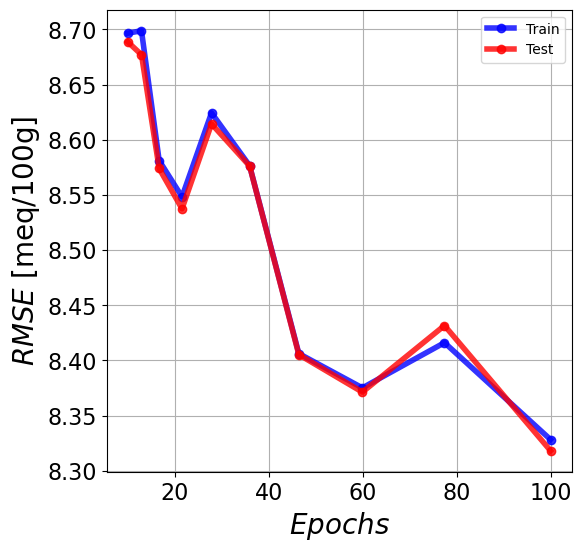

In [ ]:
""""Ploting Neural networks performance"""
lw = 4                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
fig, ((ax)) = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(epoch_, RMSE_train_nn_,       c = "blue",           marker="o", alpha=aa, linewidth=lw, label= 'Train')
ax.plot(epoch_, RMSE_test_nn_,     c = 'red',      marker="o", alpha=aa, linewidth=lw, label= 'Test')

ax.set_xlabel("$Epochs$",   fontsize=20)
ax.set_ylabel("$RMSE$ [meq/100g]",  fontsize=20)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.legend(loc='best', fontsize=10)
ax.grid()

print(score_train_nn_, score_test_nn_)

plt.savefig("NN_cec", dpi=100)

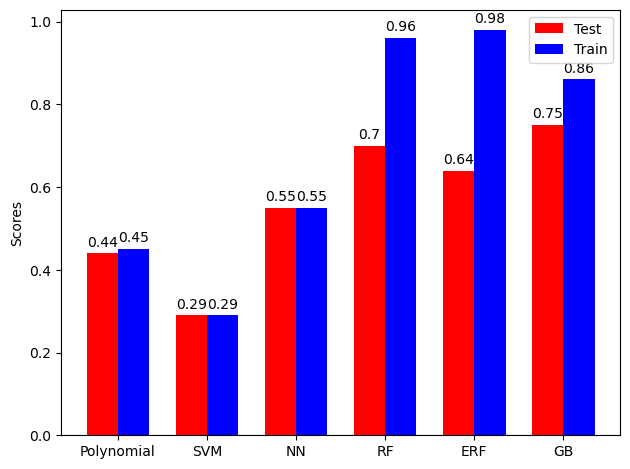

<Figure size 640x480 with 0 Axes>

In [ ]:
np.set_printoptions(precision=2)

x_labels = ['Polynomial', 'SVM', 'NN', 'RF', 'ERF', 'GB']
test_errors = [0.44, 0.29, 0.55, 0.70, 0.64, 0.75]
train_errors = [0.45, 0.29, 0.55, 0.96, 0.98, 0.86]
fig, ax = plt.subplots()

width = 0.35  # the width of the bars

x = np.arange(len(x_labels))
rects1 = ax.bar(x - width/2, test_errors, width, color = 'red', label='Test')
rects2 = ax.bar(x + width/2, train_errors, width, color = 'blue', label='Train')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_xticks(range(len(test_errors)), labels=x_labels)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.legend()
fig.tight_layout()

plt.show()
plt.savefig("results_cec", dpi=200)